In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file_data = open("Kalman_data_final.txt","r")

In [4]:
time = []
data = []

Acc_x = []
Acc_y = []
Acc_z = []

Gyro_x = []
Gyro_y = []
Gyro_z = []

Mag_x = []
Mag_y = []
Mag_z = []

sAx = 0.0
sAy = 0.0 
sAz = 0.0
sWx = 0.0
sWy = 0.0
sWz = 0.0

currentSample = 0
dt = 0.00635

In [5]:
for l in file_data.readlines():
    try:
        temp = l.split(' ')

        Gyro_x.append(float(temp[0]))
        Gyro_y.append(float(temp[1]))
        Gyro_z.append(float(temp[2]))
    
        Acc_x.append(float(temp[3]))
        Acc_y.append(float(temp[4]))
        Acc_z.append(float(temp[5]))

        Mag_x.append(float(temp[6]))
        Mag_y.append(float(temp[7]))
        Mag_z.append(float(temp[8]))
            # data = np.array(data)
        currentSample += dt
        time.append(currentSample)
    except Exception as e:
        print(e)


file_data.close()

could not convert string to float: 


In [6]:
Acc_x = np.array(Acc_x)
Acc_y = np.array(Acc_y)
Acc_z = np.array(Acc_z)

Gyro_x = np.array(Gyro_x)
Gyro_y = np.array(Gyro_y)
Gyro_z = np.array(Gyro_z)

Mag_x = np.array(Mag_x)
Mag_y = np.array(Mag_y)
Mag_z = np.array(Mag_z)

print(Acc_x.mean())
print(Acc_x.std())

print(Acc_y.mean())
print(Acc_y.std())

print(Acc_z.mean())
print(Acc_z.std())

print(Gyro_x.mean())
print(Gyro_x.std())

print(Gyro_y.mean())
print(Gyro_y.std())

print(Gyro_z.mean())
print(Gyro_z.std())

51.08930089300893
89.29361040365008
556.7125671256713
43.22041245996461
17100.29241292413
136.89504573969188
-27.12032
3.004350694842398
18.328323283232834
7.816676781344359
-15.62560625606256
2.2392880275471407


In [7]:
q = np.array([1,0,0,0])
x = np.array([1,0,0,0])
bw = np.array([-27.12032, 18.3283232832,-15.6256062561])
bw_ = bw/(16.4*180)*np.pi
x_ = np.append(q,bw_)
print(x_)
quat = []
quat1 = []
quat2 = []

quat_ = []
quat1_ = []
quat2_ = []

[ 1.          0.          0.          0.         -0.02886213  0.01950546
 -0.01662916]


In [8]:
def quat_rot(w,t):
    w1 = w/(16.4*180)*np.pi
    w = (w - bw)/(16.4*180)*np.pi
    
#     a = a/16384
    global q,x,x_
    g = 9.81
    
    
#     print(x_)
    q_mul = np.array([[-x_[1],-x_[2],-x_[3]],
                      [x_[0], -x_[3],x_[2]],
                      [x_[3], x_[0], -x_[1]],
                      [-x_[2], x_[1],x_[0]]])
    Sq = q_mul*0.5*t
#     print(q_mul)
#     print(Sq)  
    F1 = np.append(np.eye(4),-Sq,axis = -1)
    F2 = np.append(np.zeros((3,4)),np.eye(3),axis = -1) 
    A = np.append(F1,F2,axis = 0)
    B = np.append(Sq,np.zeros((3,3)),axis = 0)
#     print(np.round(A,decimals=3))
#     print(np.round(B,decimals=3))
    w_rot = np.array([[0,-w[0],-w[1],-w[2]],
                      [w[0],0, w[2], -w[1]],
                      [w[1],-w[2],0,w[0]],
                      [w[2],w[1],-w[0],0]])
#     print(np.round(A,decimals = 3))
    x_ = np.dot(A,x_) +  np.dot(B,w1)
#     x_ = x_ - np.dot(B,bw_)
#     x_ -= np.dot(B,bw_)
#     print(x)
    
    quat_.append(np.arctan(2*(x_[0]*x_[3] + x_[1]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[3]*x_[3])))*180/np.pi)
    quat1_.append(np.arcsin(2*(x_[0]*x_[2] - x_[1]*x_[3]))*180/np.pi)
    quat2_.append(np.arctan(2*(x_[0]*x_[1] + x_[3]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[1]*x_[1])))*180/np.pi)



In [9]:
# w_ = np.array([Gyro_x,Gyro_y,Gyro_z])
# print(w_.shape)
# q = np.array([1,0,0,0])
# w_ = np.transpose(w_)
for i in w_:
#     print(i)
    quat_rot(i,0.00635)
# print(len(quat_))
# print(len(time))
# plt.scatter(time[0:100000],quat_,label='gyro_angle drift',linewidth=1)
# plt.show()

# gyro_angle = []
# gyro_tmp = 0
# for (i,t) in enumerate(time[0:99999]):
#     gyro_tmp = gyro_tmp + dt*((Gyro_x[i] + 27.12032)/16.4)
#     gyro_angle.append(gyro_tmp)
# plt.scatter(time[0:99999],gyro_angle,label='gyro_angle drift',linewidth=1)
# plt.show()
# quat = np.array(quat)

# gyro_angle = np.array(gyro_angle)

# print(quat[0:10000].shape)
# print(gyro_angle[0:999].shape)
# np.std(quat[0:10000] - gyro_angle)

NameError: name 'w_' is not defined

ValueError: x and y must be the same size

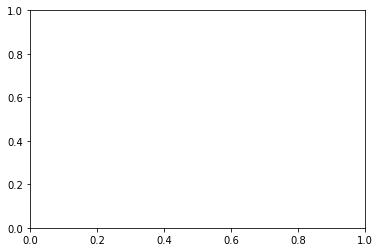

In [10]:
w_ = np.array([Gyro_x,Gyro_y,Gyro_z])

plt.scatter(time[0:100000],quat1_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_y[i]  - 18.3283232832)/16.4)
    gyro_angle.append(gyro_tmp)

plt.scatter(time[0:100000],gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()



ValueError: x and y must be the same size

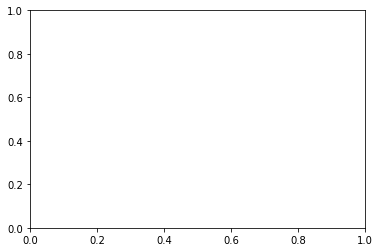

In [105]:
w_ = np.array([Gyro_x,Gyro_y,Gyro_z])

plt.scatter(time[0:100000],quat2_,label='gyro_angle drift',linewidth=1)
plt.show()
gyro_angle = []
gyro_tmp = 0
for (i,t) in enumerate(time[0:100000]):
    gyro_tmp = gyro_tmp + dt*((Gyro_z[i] + 15.6256062561)/16.4)
    gyro_angle.append(gyro_tmp)
print(len(time))
plt.scatter(time[0:100000],gyro_angle,label='gyro_angle drift',linewidth=1)
plt.show()

quat2 = np.array(quat2_)

gyro_angle = np.array(gyro_angle)

print(quat2.shape)
print(gyro_angle.shape)
np.std(quat - gyro_angle)

In [106]:
quat = np.array(quat)
quat1 = np.array(quat1)
gyro_angle = np.array(gyro_angle)

print(quat1[0:999].shape)
print(gyro_angle.shape)
np.std(quat1[0:999] - gyro_angle)

NameError: name 'gyro_angle' is not defined

In [11]:
P = np.identity(7) * 0.1
Q = np.array([[0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0],
              [0,0,0,0,0.0926,0,0],
              [0,0,0,0,0,0.2968,0],
              [0,0,0,0,0,0,0.0214]])
R = np.identity(6) * 0.01
quat_ = []
quat1_ = []
quat2_ = []
def ekf(w,a,m,t):
    w1 = w/(16.4*180)*np.pi
    w = (w - bw)/(16.4*180)*np.pi
    
#     a = a/16384
    global q,x,x_,P
    g = 9.81
    
    
#     print(x_)
    q_mul = np.array([[-x_[1],-x_[2],-x_[3]],
                      [x_[0], -x_[3],x_[2]],
                      [x_[3], x_[0], -x_[1]],
                      [-x_[2], x_[1],x_[0]]])
    Sq = q_mul*0.5*t
#     print(q_mul)
#     print(Sq)  
    F1 = np.append(np.eye(4),-Sq,axis = -1)
    F2 = np.append(np.zeros((3,4)),np.eye(3),axis = -1) 
    A = np.append(F1,F2,axis = 0)
    B = np.append(Sq,np.zeros((3,3)),axis = 0)
#     print(np.round(A,decimals=3))
#     print(np.round(B,decimals=3))
    w_rot = np.array([[0,-w[0],-w[1],-w[2]],
                      [w[0],0, w[2], -w[1]],
                      [w[1],-w[2],0,w[0]],
                      [w[2],w[1],-w[0],0]])
#     print(np.round(A,decimals = 3))
    x_ = np.dot(A,x_) +  np.dot(B,w1)
    P = np.dot(np.dot(A,P),np.transpose(A)) +Q
#     print(P)
    
    C1 = np.array([[-x[2],x[3],-x[0],x[1]],
                   [x[1],x[0],x[3],x[2]],
                   [x[0], -x[1],-x[2],x[3]]])
# #     print(P)
    C1 = -2*g*C1
    
    C2 = np.array([[x[3],x[2],x[1],x[0]],
                   [x[0],-x[1],x[2],-x[3]],
                   [-x[1],-x[0],x[3],x[2]]])
    C2 = -2*C2
    y = np.append(a,m,axis = 0)
    H = np.append(C1,C2,axis = 0)
    H = np.append(H, np.zeros((6,3)),axis = -1)
    
    S = np.dot(np.dot(H, P),np.transpose(H)) + R
    K = np.dot(np.dot(P,np.transpose(H)),np.linalg.inv(S))
    
    x_ = x_ + np.dot(K,(y-np.dot(H,x_)))
    P = np.dot((np.eye(7) - np.dot(K,H)),P)
    
    quat_.append(np.arctan(2*(x_[0]*x_[3] + x_[1]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[3]*x_[3])))*180/np.pi)
    quat1_.append(np.arcsin(2*(x_[0]*x_[2] - x_[1]*x_[3]))*180/np.pi)
    quat2_.append(np.arctan(2*(x_[0]*x_[1] + x_[3]*x_[2])/(1- 2*(x_[2]*x_[2] + x_[1]*x_[1])))*180/np.pi)
#     print(P)
    

In [12]:
w = np.array([Gyro_x[0:99999],Gyro_y[0:99999],Gyro_z[0:99999]])
a = np.array([Acc_x,Acc_y,Acc_z])
m = np.array([Mag_x,Mag_y,Mag_z])
print(w.shape)
print(a.shape)
print(m.shape)
print(len(time))
for (i, index) in enumerate(Gyro_x[0:999]):
    ekf(w[:,i],a[:,i],m[:,i],dt)

(3, 99999)
(3, 99999)
(3, 99999)
99999


/home/danglamtung/.local/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in arcsin


In [13]:
w = np.array([Gyro_x[0:9999],Gyro_y,Gyro_z])
print(Gyro_x.shape)
a = np.array([Acc_x,Acc_y,Acc_z])
m = np.array([Mag_x,Mag_y,Mag_z])
print(w.shape)
print(a.shape)
print(m.shape)
print(len(time))
for (i, index) in enumerate(Gyro_x):
    ekf(w[:,i],a[:,i],m[:,i],dt)

(100000,)
(3,)
(3, 99999)
(3, 99999)
99999


IndexError: too many indices for array

999
99999


ValueError: x and y must have same first dimension, but have shapes (99999,) and (999,)

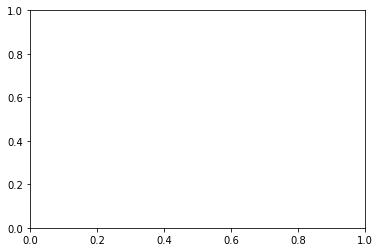

In [14]:
print(len(quat_))
print(len(time))
quat_ = np.array(quat_)
quat_ =  quat_ + 90
plt.plot(time,quat_[0:99999],label='gyro_angle drift',linewidth=1)
plt.show()


In [15]:
print(P)


[[ 6.53878205e-06 -5.47141782e-07  2.09271269e-07 -3.64063663e-05
  -1.69454677e-07  3.36426142e-07  6.94444072e-06]
 [-5.47141781e-07  2.56940625e-05  5.95938881e-09 -1.03616660e-06
   9.31461517e-06 -1.67586367e-07  1.05221966e-07]
 [ 2.09271269e-07  5.95938421e-09  2.59751913e-05  4.07407651e-07
   1.75206957e-07  9.40695148e-06 -3.38279262e-07]
 [-3.64063663e-05 -1.03616660e-06  4.07407651e-07  2.39471507e-03
   9.64075986e-06  2.54881590e-05  8.89957118e-04]
 [-1.69454676e-07  9.31461518e-06  1.75206958e-07  9.64075986e-06
   9.26068122e-02  1.56058727e-07  5.45954174e-06]
 [ 3.36426142e-07 -1.67586369e-07  9.40695148e-06  2.54881590e-05
   1.56058726e-07  2.96807237e-01  1.45262194e-05]
 [ 6.94444072e-06  1.05221966e-07 -3.38279262e-07  8.89957118e-04
   5.45954174e-06  1.45262194e-05  2.19189024e-02]]


999
99999


ValueError: x and y must be the same size

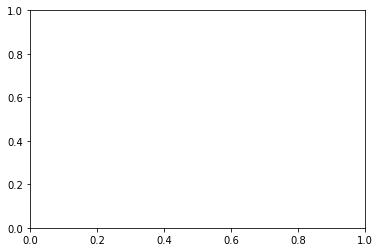

In [16]:
print(len(quat1_))
print(len(time))
plt.scatter(time,quat1_[0:999],label='gyro_angle drift',linewidth=1)
plt.show()

In [ ]:
print(len(quat2_))

quat2_ = np.array(quat2_)
quat2_ =  quat2_ - 90

plt.plot(time,quat2_[0:99999],label='gyro_angle drift',linewidth=1)
plt.show()